In [1]:
# Non-negative matrix factorization
# これも有用な特徴量を抽出することを目的とする教師なし学習手法である
# このアルゴリズムの動作はPCAと似ており、やはり次元削減に用いることができる
# PCAと同様に、個々のデータポイントをいくつかの成分の重み付き和として表現したい
# NMFでは係数と成分が非負であること、つまり、成分とその係数が常にゼロ以上であることが求められるため、個々の特徴量が非負のデータにしか適用できない
# データを非負の重み付き和に分解する方法は、いくつもの独立した発生源から得られたデータを重ね合わせて作られるようなデータに対して特に有効だ
# 例えば、複数の人が話している音声データや、多数の楽器からなる音楽などだ

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterat

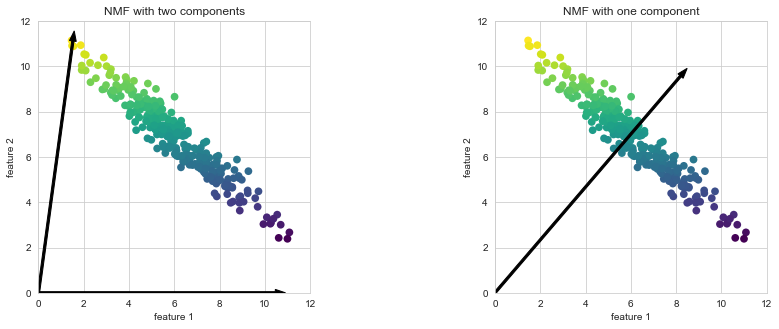

In [3]:
# データが全て正であるということは、原点に対してどの位置にあるということが、NMFでは問題になるということを意味する
# 以下は2次元のトイデータにNMFを適用した結果
# 特徴量と同じ数の成分がある（完全にデータを再現できる）場合は、このアルゴリズムはデータの極端な部分の方向を向く
# 1つの成分の場合は、データの平均値へ向かう成分を作る（この点が最もデータをよく説明するため）
# PCAと異なり、成分の数が変わると、いくつかの成分がなくなるのではなく、全く別の成分集合が構成される
# NMFの成分は特定な順番で並んでいるわけでないため、「最初の非負成分」などというものはなく、すべての成分が同等となる
# NMFは乱数初期化を用いるため、乱数シードが変わると結果が変わる場合がある
import mglearn

mglearn.plots.plot_nmf_illustration()

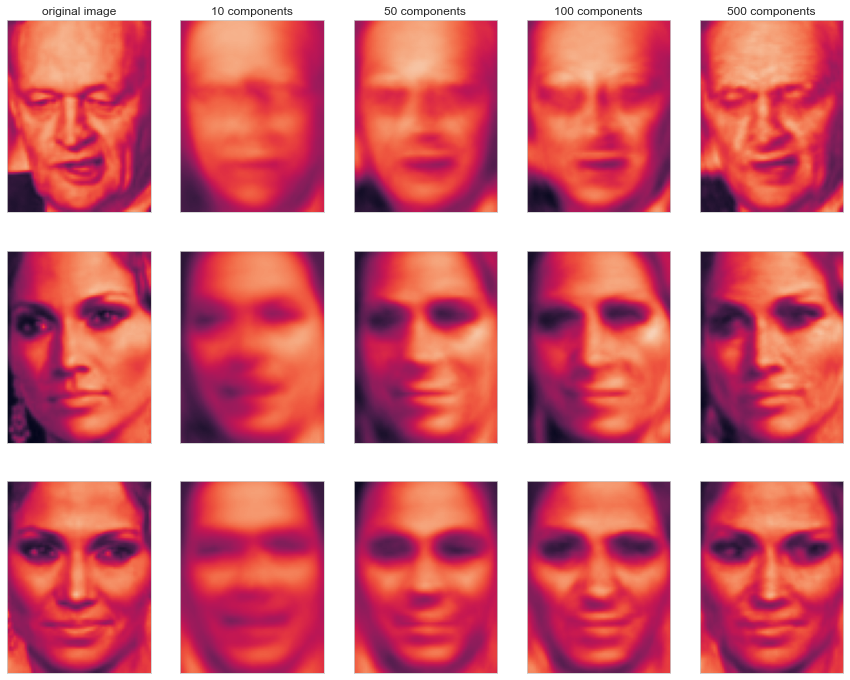

In [4]:
# PCAと時と同様にNMFでも、顔画像が成分の重み付き和として表現されることを理解するために、成分のいくつかだけ残したものを逆回転してもとの空間に戻す
# PCAの時と同様の傾向だが、少し粗く感じる。これはPCAが再構成に最適な方向を見つけることから当然だ（NMFには上述のように成分に順番がないしね）
# NMFは再構成やデータのエンコードに用いられるよりは、データ中から興味深いパターンを見つけるのに用いられる
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype = np.bool_)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people/255

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state = 0)
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


[[0.         0.         0.         ... 0.00271563 0.03224666 0.05210514]
 [0.61802244 0.6379303  0.6695161  ... 0.         0.         0.        ]
 [0.28824437 0.3074141  0.3205366  ... 0.         0.         0.        ]
 ...
 [0.00849031 0.         0.         ... 0.         0.         0.        ]
 [0.21345454 0.14676103 0.08959241 ... 0.04880976 0.00994485 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(15, 5655)


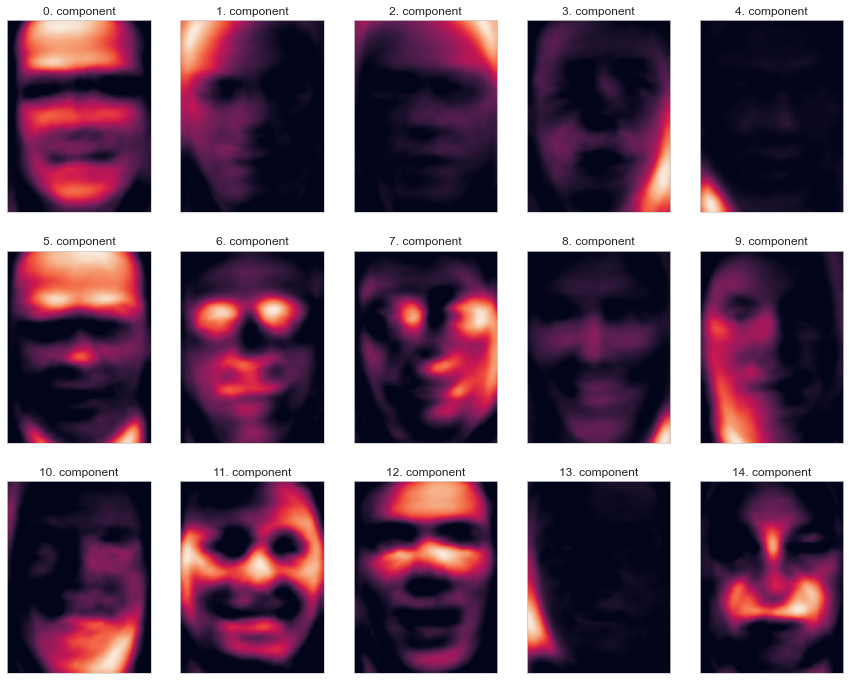

In [5]:
# NMFの主要なパラメータは、いくつの成分を抽出するかを指定する
# 通常この数は、入力特徴量の数よりも小さくなる（そうでないと、データのピクセルをそれぞれ成分にして説明することになる）
# PCAの時よりも画像の特徴を直接捉えているように感じる
from sklearn.decomposition import NMF

nmf = NMF(n_components = 15, random_state = 0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

print(nmf.components_)
print(nmf.components_.shape)

fix, axes = plt.subplots(3, 5, figsize = (15, 12), subplot_kw = {"xticks":(),"yticks":()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title(f"{i}. component")

[[0.18474425 0.32086855 0.553697   ... 0.69549036 0.0172675  0.46883857]
 [0.5899137  0.04708317 0.         ... 0.16324294 0.13172941 0.9258908 ]
 [0.25370333 0.5994501  0.38440967 ... 0.66339046 0.14123718 0.40611345]
 ...
 [0.3390426  0.40743718 0.14449674 ... 0.14556576 0.1259571  0.58034706]
 [0.5368979  0.26281112 0.38680628 ... 0.2724495  0.11392859 0.31095067]
 [0.00764905 0.07413319 0.04514462 ... 0.34342468 0.19692405 0.703664  ]]
(1547, 15)
[ 947 1245  737 ...  414  682 1202]


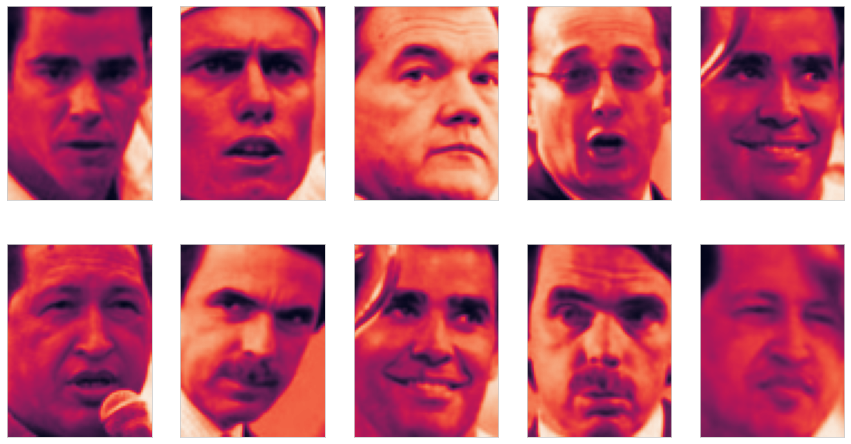

In [6]:
# 予想通り、成分3の係数が大きい顔画像は右を向いている
compn = 3

print(X_train_nmf)
print(X_train_nmf.shape)

inds = np.argsort(X_train_nmf[:, compn])[::-1]
print(inds)
fig, axes = plt.subplots(2, 5, figsize = (15, 8), subplot_kw = {"xticks":(),"yticks":()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

[[0.18474425 0.32086855 0.553697   ... 0.69549036 0.0172675  0.46883857]
 [0.5899137  0.04708317 0.         ... 0.16324294 0.13172941 0.9258908 ]
 [0.25370333 0.5994501  0.38440967 ... 0.66339046 0.14123718 0.40611345]
 ...
 [0.3390426  0.40743718 0.14449674 ... 0.14556576 0.1259571  0.58034706]
 [0.5368979  0.26281112 0.38680628 ... 0.2724495  0.11392859 0.31095067]
 [0.00764905 0.07413319 0.04514462 ... 0.34342468 0.19692405 0.703664  ]]
(1547, 15)
[ 436 1489   55 ... 1477  616 1408]


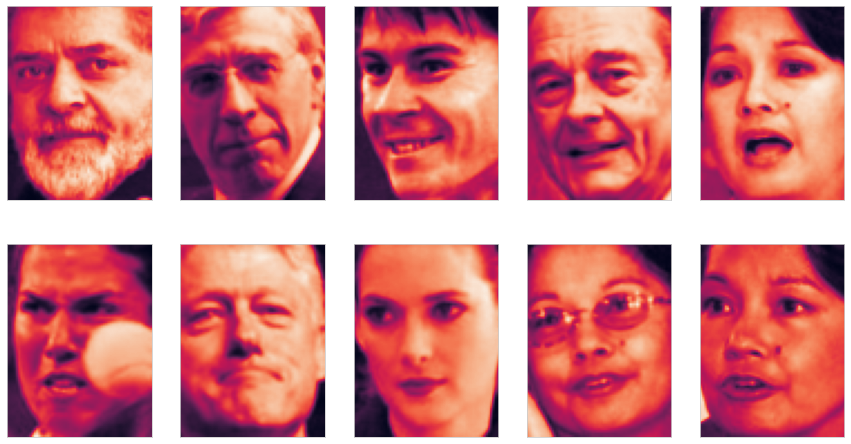

In [7]:
# 予想通り、成分3の係数が大きい顔画像は左を向いている
compn = 7

print(X_train_nmf)
print(X_train_nmf.shape)

inds = np.argsort(X_train_nmf[:, compn])[::-1]
print(inds)
fig, axes = plt.subplots(2, 5, figsize = (15, 8), subplot_kw = {"xticks":(),"yticks":()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

[[2.65408203 2.48908887 1.07757433]
 [2.94981947 3.45507031 0.79929765]
 [2.97649958 3.65235694 0.73473133]
 ...
 [2.22337048 1.33481395 4.31421863]
 [2.36722058 1.56522921 4.53698235]
 [1.77945297 1.62362822 0.47660599]]
(2000, 3)


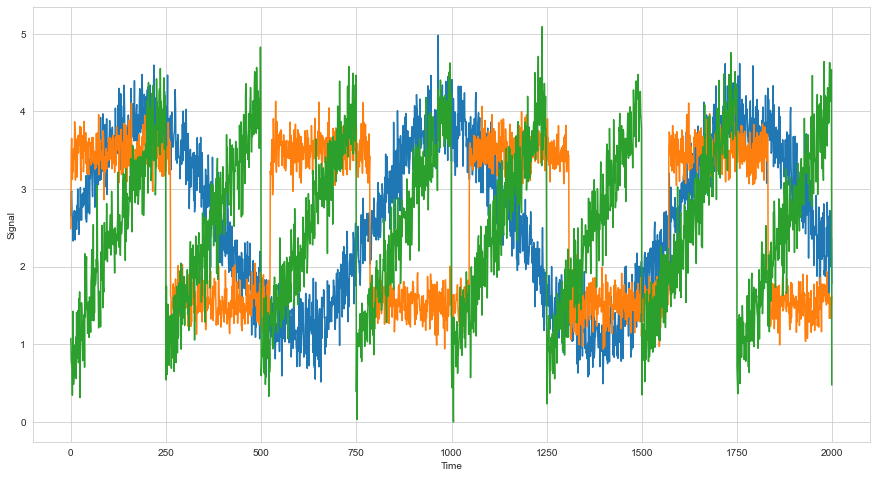

In [8]:
# 3つの信号源からの信号が組み合わされた信号
S = mglearn.datasets.make_signals()
plt.figure(figsize = (15, 8))
plt.plot(S, "-")
plt.xlabel("Time")
plt.ylabel("Signal")
print(S)
print(S.shape)

In [9]:
# 上記3つの信号が混ざったものが、100個観測できたとする（100個別々のマイクで音声を拾ったと考えられる）
A = np.random.RandomState(0).uniform(size = (100, 3))
X = np.dot(S, A.T)
print(X)
print(f"Shape of measurements: {X.shape}")

[[3.88628829 3.19667802 4.41951286 ... 2.61424389 2.02086225 5.74538084]
 [4.57171766 3.58732579 5.14219507 ... 3.39605065 2.36153667 6.67280745]
 [4.68853914 3.64374175 5.26758468 ... 3.54963822 2.413116   6.82571726]
 ...
 [4.77531347 4.56350593 6.32072136 ... 2.22079964 1.85839553 7.36088845]
 [5.1533247  4.88338574 6.80381553 ... 2.47221245 2.00543108 7.92312939]
 [2.42507009 1.96528889 2.68586111 ... 1.6689038  1.32070881 3.57182835]]
Shape of measurements: (2000, 100)


In [10]:
# NMFを用いて、3つの信号を復元する
nmf = NMF(n_components = 3, random_state = 42)
S_ = nmf.fit_transform(X)
print(f"Recovered signal shape: {S_.shape}")

Recovered signal shape: (2000, 3)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [11]:
# NMFとの比較
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
H = pca.fit_transform(X)

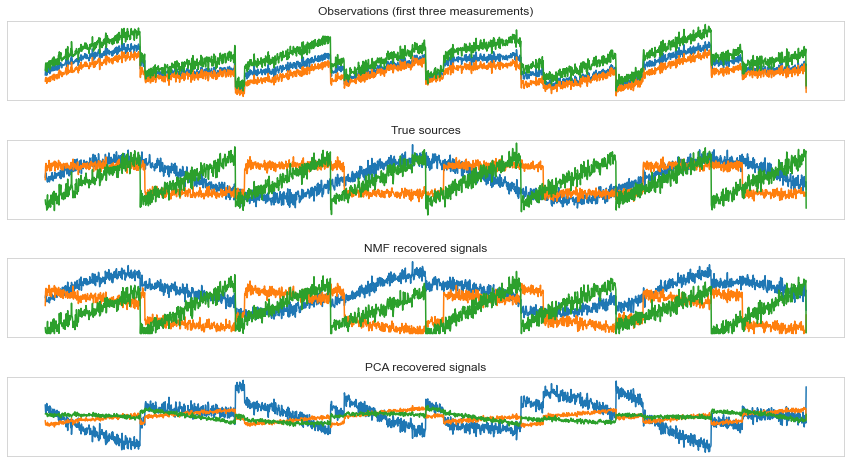

In [12]:
# NMFはもとの信号源をかなりうまく特定できている。PCAは第一主成分を大きな変動を説明するのに使っており、信号源の特定には失敗している
models = [X, S, S_, H]
names = ["Observations (first three measurements)",
        "True sources",
        "NMF recovered signals",
        "PCA recovered signals"]

fig, axes = plt.subplots(4, figsize = (15, 8), gridspec_kw = {"hspace":.5}, subplot_kw = {"xticks":(),"yticks":()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:,:3], "-")